# Data augmentaion
(tf.keras)
(tf.image)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

### Dataset

In [10]:
# Descargar dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [42]:
numpy_classes = metadata.features['label'].names
print(numpy_classes)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


Text(0.5, 1.0, 'tulips')

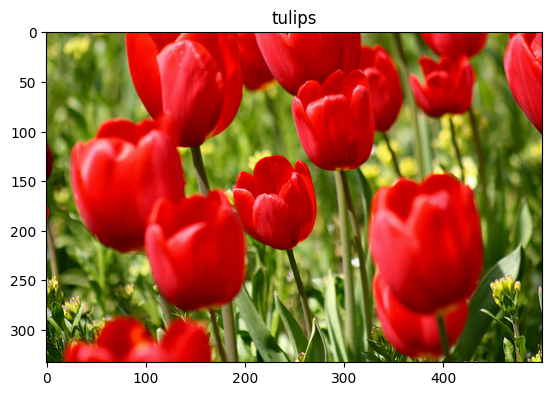

In [43]:
# Mostrar imagen
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label))

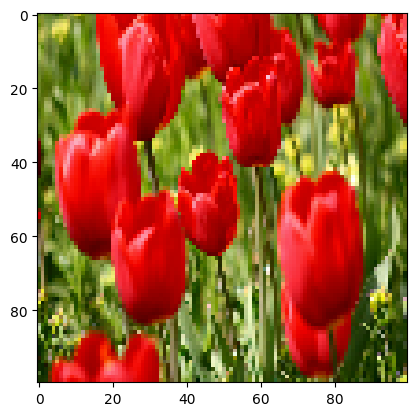

In [44]:
# Resizing and Rescaling
IMG_SIZE = 100

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize_and_rescale(image)
plt.imshow(result)

### Se recomienda hacer primero el aumento de datos y después el reescalamiento para no perder información importante de la imagen

In [45]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


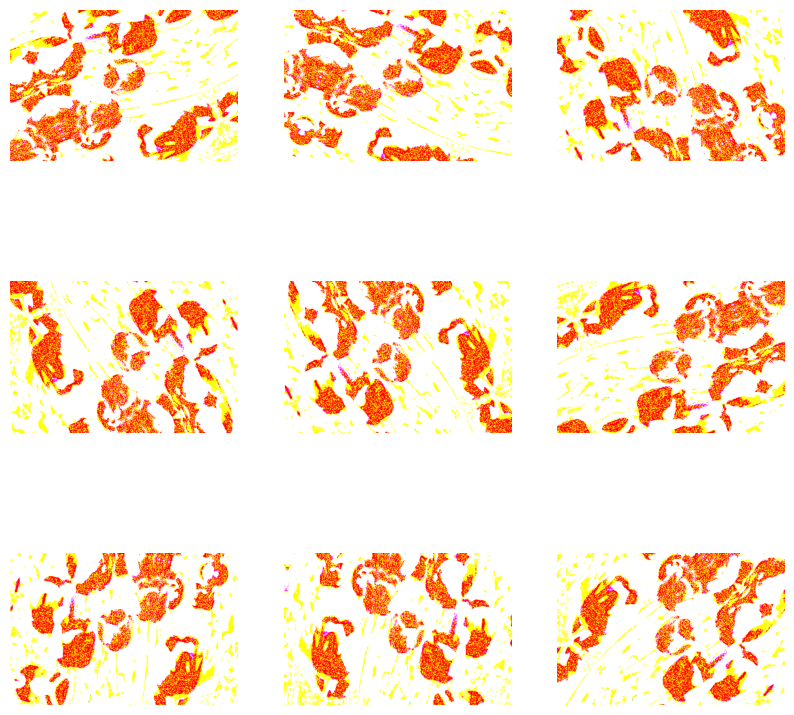

In [46]:
# Agregar la imagen al batch
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

## Usando tf.image

In [49]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.09JGIR_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


Text(0.5, 1.0, 'dog')

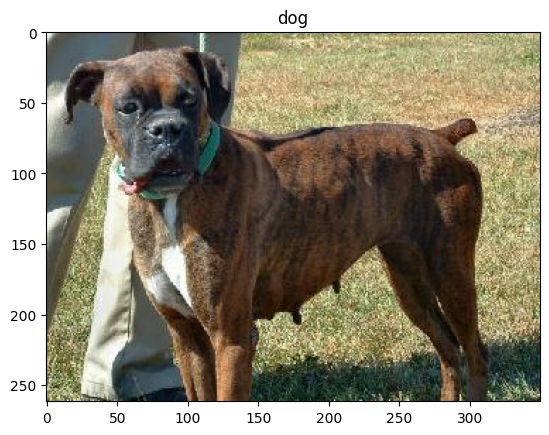

In [51]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label))

In [52]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

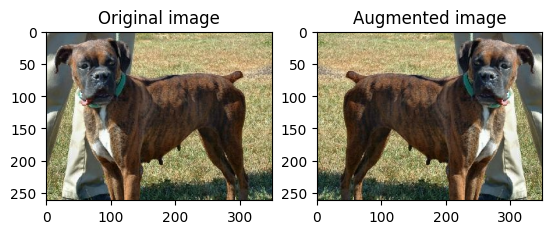

In [53]:
# Flip
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)



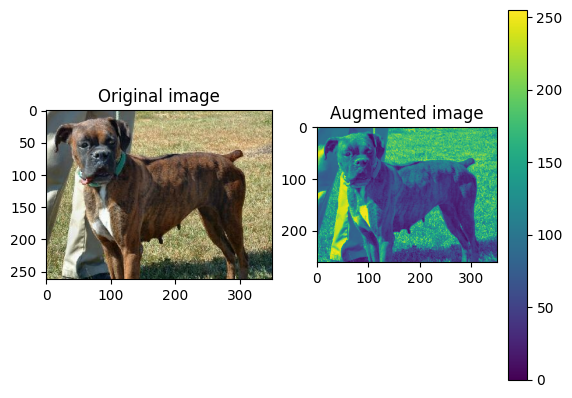

In [55]:
#Grayscale
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, grayscaled)
plt.colorbar()

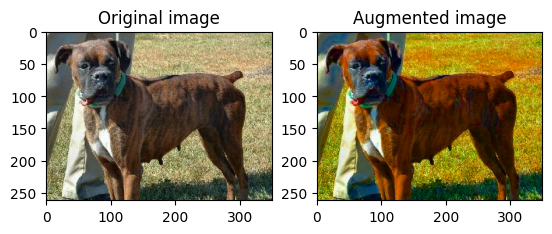

In [56]:
# Saturación
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

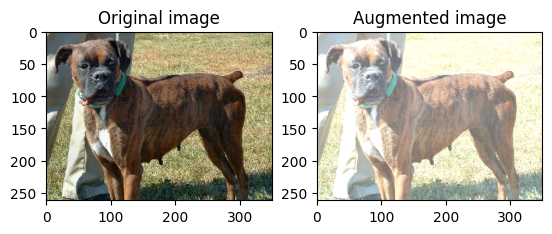

In [60]:
# Brillo
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

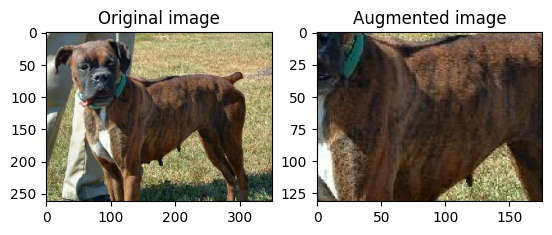

In [63]:
# Crop
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

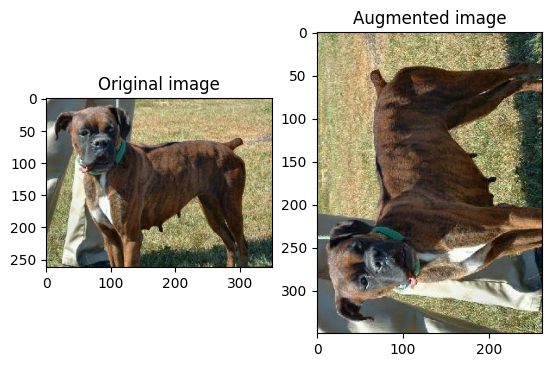

In [64]:
# Rotate
rotated = tf.image.rot90(image)
visualize(image,rotated)

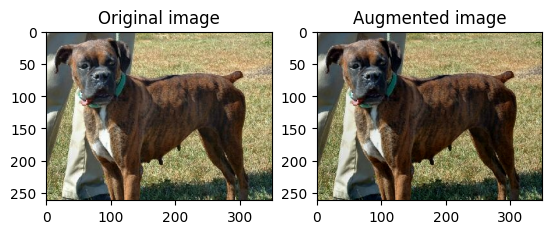

In [71]:
# Brillo aleatorio
random_brightness = tf.image.stateless_random_brightness(
    image, max_delta=0.95, seed=(np.random.randint(1000),np.random.randint(1000))
)
visualize(image, random_brightness)

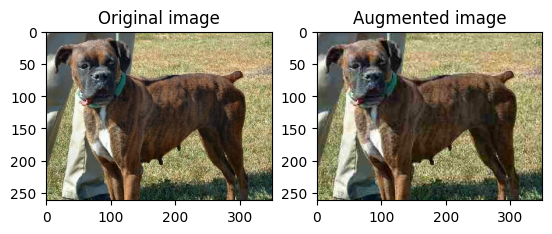

In [79]:
# Random image quality (compresion)
random_jpeg = tf.image.stateless_random_jpeg_quality(
    image, min_jpeg_quality=10, max_jpeg_quality=30, seed=(np.random.randint(1000),np.random.randint(1000))
)
visualize(image, random_jpeg)

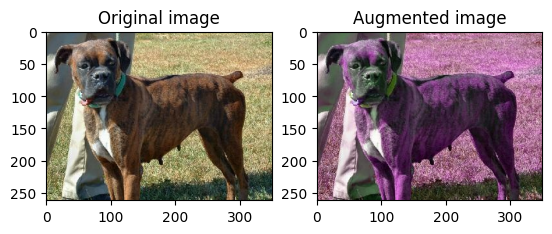

In [85]:
# Random hue
random_hue = tf.image.stateless_random_hue(
    image, max_delta=0.5, seed=(np.random.randint(1000),np.random.randint(1000))
)
visualize(image, random_hue)


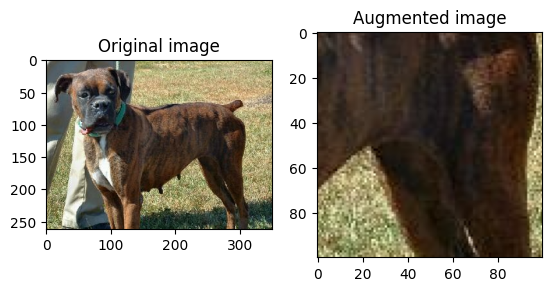

In [88]:
# Random crop
random_crop = tf.image.stateless_random_crop(
    image, size=[100, 100, 3], seed=(np.random.randint(1000),np.random.randint(1000))
)
visualize(image, random_crop)

In [90]:
# Salt and pepper reduction filter


AttributeError: module 'tensorflow._api.v2.image' has no attribute 'salt_and_pepper'